# Homework 3 - Ames Housing Dataset

## Part 1 - Pairwise Correlations

In [0]:
import numpy as np
import pandas as pd
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt
import getpass
import os
from sklearn.preprocessing import LabelEncoder
from scipy.stats.stats import pearsonr as prsn
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [0]:
#reading train Dataset
trainData = pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv')
trainDatadf = pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv')

In [0]:
testData = pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/test.csv')
testData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [0]:
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Features for finding Pearson Correlation

In [0]:
interestingCols = ['LotArea','OverallQual','YearBuilt','GrLivArea','FullBath','GarageArea','SalePrice','HeatingQC','1stFlrSF','TotalBsmtSF','TotRmsAbvGrd','OverallCond','BsmtFinSF1','BsmtUnfSF','EnclosedPorch','GarageCars']
train_df_corrCols = trainData[interestingCols]

### Analysis of Sales Price Variable

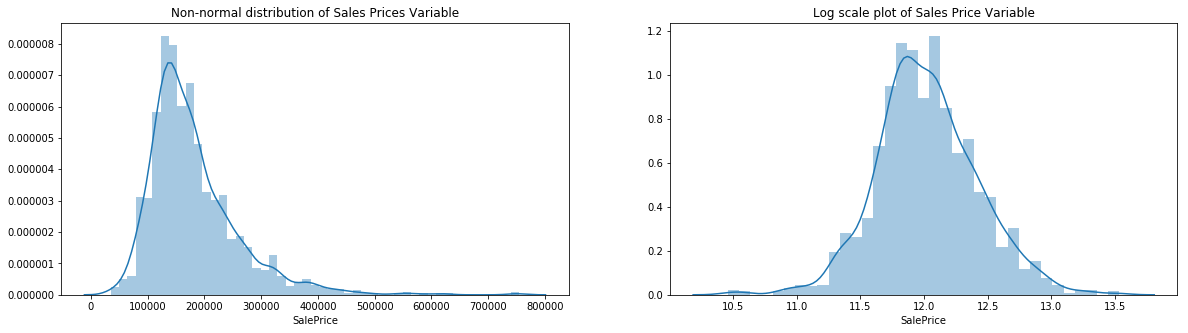

In [0]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(np.log(train_df_corrCols['SalePrice']),ax = ax2).set_title('Log scale plot of Sales Price Variable');
sns.distplot(train_df_corrCols['SalePrice'],ax = ax1).set_title('Non-normal distribution of Sales Prices Variable');

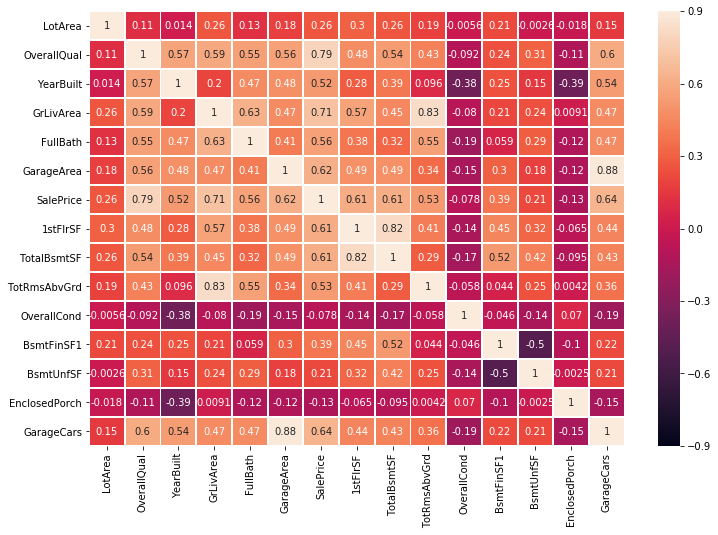

In [0]:
train_df_corr = train_df_corrCols.corr(method ='pearson') 
plt.figure(figsize=(12, 8))
sns.heatmap(train_df_corr, vmin=-0.9, vmax=0.9, linewidths=.8, annot=True);

### Highest Positive Correlation

1. Garage Cars and Garage Area -> 0.88. This is as expected because the more the Garage Area more cars it can accomodate
2. TotalRmsAbvGrd and GrLivArea - 0.83. The high correlation between these two variables is due to the reason, greater the Living Area more the number of rooms.



### Highest Negative Correlation
1. BsmtUnfSF and BsmtFinSF1 -> -0.5
2. YearBuilt and Enclosed Porch -> -0.39


## Part 2 - Informative Plots

In [0]:
# Function to generate Scatter plot for features
def scatterPlot(var):
    plt.figure(figsize=(10,5))
    data = pd.concat([trainData['SalePrice'], trainData[var]], axis=1)
    plt.scatter(y = trainData['SalePrice'], x= trainData[var]);
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()

### Scatter Plot - GrLivArea vs SalePrice

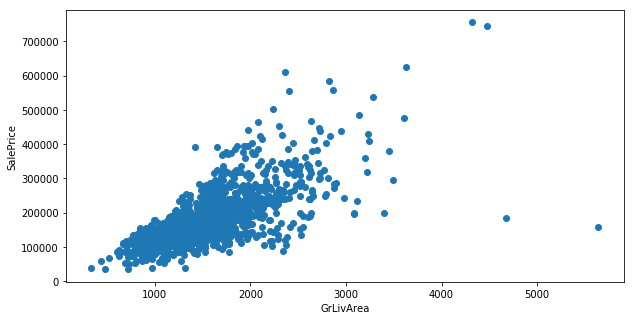

'SalePrice' and 'GrLivArea' have a linear relationship. We can also see two outliers, this can be due to the locality of the houses


In [0]:
scatterPlot('GrLivArea')
print("'SalePrice' and 'GrLivArea' have a linear relationship. We can also see two outliers, this can be due to the locality of the houses")

### Histogram - TotRmsAbvGrd

We can see there were more number of houses in the dataset with Total rooms bwteen 6-7


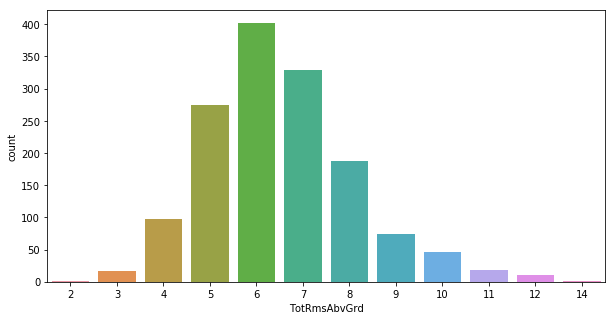

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(trainData.TotRmsAbvGrd);
print("We can see there were more number of houses in the dataset with Total rooms bwteen 6-7")

Sale Price data is skewed, so we should normalize it for prediction


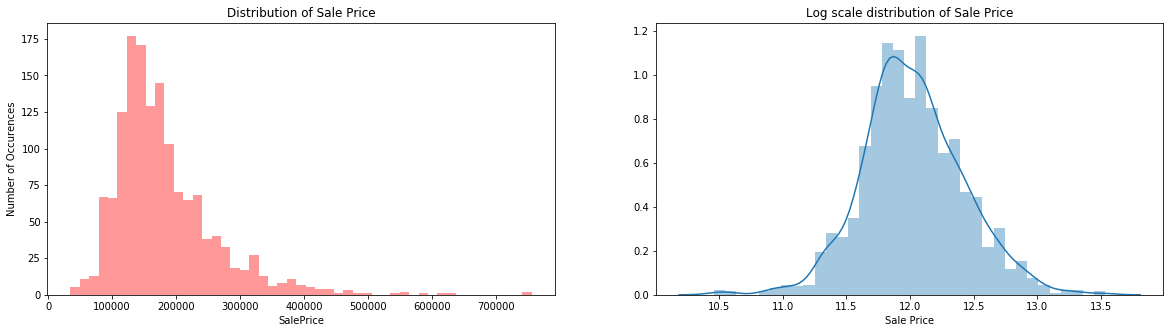

In [0]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))
ax = sns.distplot(trainData['SalePrice'], color="r", kde=False, ax = ax1).set_title("Distribution of Sale Price")
plt2 = sns.distplot(np.log(trainData['SalePrice']),ax = ax2).set_title('Log scale distribution of Sale Price');
ax1.set_ylabel("Number of Occurences")
plt.xlabel("Sale Price")
print("Sale Price data is skewed, so we should normalize it for prediction")
plt.show()

### Line Plot - YearBuilt and Mean Sale Price with number of sold Houses

<Figure size 720x360 with 0 Axes>

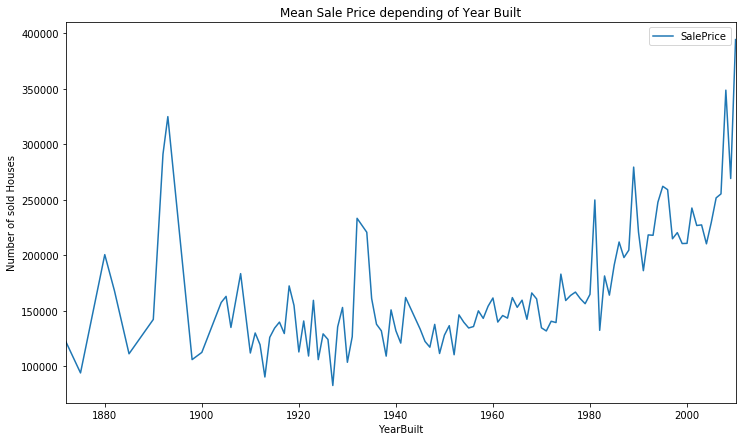

As a trend we can see that the Mean Sale Price of the number of houses sold has increased with the year the house was built


In [0]:
plt.figure(figsize=(10,5));
trainData[['YearBuilt','SalePrice']].groupby(['YearBuilt'], as_index=True).mean().plot(figsize=(12,7));
plt.title('Mean Sale Price depending of Year Built');
plt.ylabel('Number of sold Houses');
plt.show();
print("As a trend we can see that the Mean Sale Price of the number of houses sold has increased with the year the house was built")

### Box Plot - OverallQual vs Sale Price

As the Overall Quality increases Sale Price increases which is an expected trend


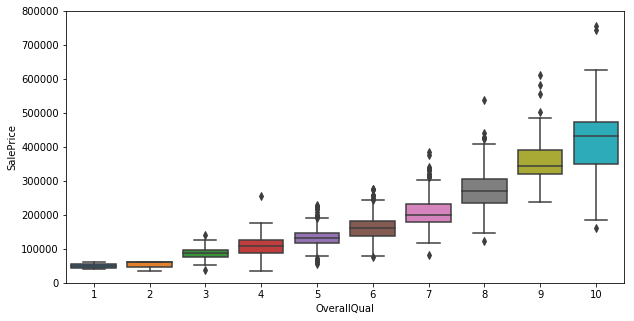

In [0]:
data = pd.concat([trainData['SalePrice'], trainData['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);
print("As the Overall Quality increases Sale Price increases which is an expected trend")

### Scatter Plot - TotalBsmtSF and Sale Price

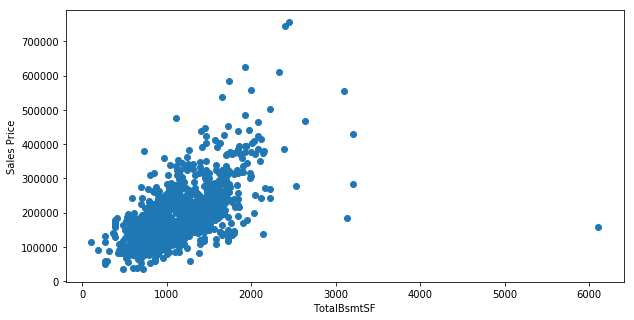

The Greater the TotalBsmtSF, greater is the Sales Price. We can see some outliers for TotalBsmt SF > 3000


In [0]:
plt.figure(figsize=(10,5))
plt.scatter(trainData[trainData['TotalBsmtSF']>0]['TotalBsmtSF'], trainData[trainData['TotalBsmtSF']>0]['SalePrice']);
plt.xlabel('TotalBsmtSF');
plt.ylabel('Sales Price');
plt.show()
print("The Greater the TotalBsmtSF, greater is the Sales Price. We can see some outliers for TotalBsmt SF > 3000")


## Part 3 - Handcrafted Scoring Function

### In this part to get the Dream house we should first do Data Pre-Processing to get the actual insight into data. Below are the steps involved in Data Pre-Processing:


*   Filling NaN values with mean, median, mode, 0 or None as suitable
*   Converting Non-numeric columns to numeric columns
*   Normalization of variables

### Feature-Engineering
Creating new features based on current features



In [0]:
featureMap = {}
featureMap['Ex'] = 5 
featureMap['Gd'] = 4 
featureMap['TA'] = 3 
featureMap['Fa'] = 2 
featureMap['Po'] = 1 
featureMap['NA'] = 0 
featureMap['None'] = 0 

In [0]:
def featureEngineering(data):
    #Cols on which we will do feature Engineering
    for col in ['KitchenQual', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']:
        data[col] = data[col].map(featureMap)
    data['OverallGrade'] = data['OverallQual'] * data['OverallCond'] #OverallQual is already numeric.
    data['KitchenScore'] = data['KitchenQual'] * data['KitchenAbvGr']
    data['BsmtGrade'] = data['BsmtQual'] * data['BsmtCond']
    data['GarageGrade'] = data['GarageQual'] * data['GarageCond']
    data['ExterGrade'] = data['ExterQual'] * data['ExterCond']
    data['FireplaceCond'] = data['Fireplaces'] * data['FireplaceQu']
    data['TotalArea'] = data['TotalBsmtSF'] + data['GrLivArea']
    data['TotalFlrSF'] = data['1stFlrSF'] + data['2ndFlrSF']
    data['TotalBath'] = data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath'] + data['FullBath'] + 0.5 * data['HalfBath']
    data['TotalPorch'] = data['OpenPorchSF'] + data['3SsnPorch'] + data['EnclosedPorch'] + data['ScreenPorch']
    data['CentralAir'] = data['CentralAir'].apply(lambda ca : 1 if ca == 'Y' else 0)
    return data

In [0]:
def transformData(data):
    data['GrLivArea'] = np.log1p(data["GrLivArea"])
#     data['SalePrice'] = np.log1p(data["SalePrice"])    
    data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    data = data.drop(['Utilities'], axis=1)
    data = featureEngineering(data)
    latestHouseBuiltYr = data['YearBuilt'].max() 
    data['YrsSinceBuilt'] = (latestHouseBuiltYr - data['YearBuilt'])
    data['YrsSinceBuilt'] = data['YrsSinceBuilt'].astype(int)
    data['YrsSinceSold'] = latestHouseBuiltYr - data['YrSold']
    data['YrsSinceRemod'] = data['YrSold'] - data['YearRemodAdd']    
    data['MSSubClass'] = data['MSSubClass'].apply(str)  
    data['OverallCond'] = data['OverallCond']
    data['YrSold'] = data['YrSold'].astype(str) 
    data['MoSold'] = data['MoSold'].astype(str)
    data.reindex()
    return data

In [0]:
def fillNaWith0(data):
    data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0) 
    data['GarageArea'] = data['GarageArea'].fillna(0) 
    data['GarageCars'] = data['GarageCars'].fillna(0)
    data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
    return data

In [0]:
def fillNaWithNone(data):
  data['GarageCond'] = data['GarageCond'].fillna('None')
  data['GarageType'] = data['GarageType'].fillna('None') 
  data['GarageFinish'] = data['GarageFinish'].fillna('None') 
  data['GarageQual'] = data['GarageQual'].fillna('None') 
  data['MasVnrType'] = data['MasVnrType'].fillna('None')
  data['BsmtQual'] = data['BsmtQual'].fillna('None')
  data['BsmtCond'] = data['BsmtCond'].fillna('None')
  data['BsmtExposure'] = data['BsmtExposure'].fillna('None')
  data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')
  data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')
  data['MiscFeature'] = data['MiscFeature'].fillna('None')
  data['Alley'] = data['Alley'].fillna('None')
  data['Fence'] = data['Fence'].fillna('None') 
  data['FireplaceQu'] = data['FireplaceQu'].fillna('None')
  data['PoolQC'] = data['PoolQC'].fillna('None')
  return data

In [0]:
def fillNaWithMode(data):
  data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
  data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
  data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
  data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0]) 
  data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
  data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0]) 
  data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])
  return data

In [0]:
def preprocessData(trainData):
  data = trainData
  data = fillNaWith0(data)
  data = fillNaWithNone(data)
  data = fillNaWithMode(data)
  data = transformData(data)
  return data

In [0]:
data = preprocessData(trainData)

In [0]:
testDataProcessed = preprocessData(testData)

In [0]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallGrade,KitchenScore,BsmtGrade,GarageGrade,ExterGrade,FireplaceCond,TotalArea,TotalFlrSF,TotalBath,TotalPorch,YrsSinceBuilt,YrsSinceSold,YrsSinceRemod
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,...,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,None,None,0,2,2008,WD,Normal,208500,35,4,12,9,12,0,863.444833,1710,3.5,61,7,2,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,...,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal,181500,48,3,12,9,9,3,1269.141245,1262,2.5,0,34,3,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,...,6,Typ,1,3,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,None,None,0,9,2008,WD,Normal,223500,35,4,12,9,12,3,927.488294,1786,3.5,42,9,2,6
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,...,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,None,None,0,2,2006,WD,Abnorml,140000,35,4,12,9,9,4,763.448916,1717,2.0,307,95,4,36
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,...,9,Typ,1,3,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,None,None,0,12,2008,WD,Normal,250000,40,4,12,9,12,3,1152.695758,2198,3.5,84,10,2,8


### Creating a new Feature for how desirable neigborhood is as more desirable the neighborhood id, more chances that we'll buy that house

In [0]:
nhdDesirability = data.groupby('Neighborhood',as_index = False).mean()[["Neighborhood",'SalePrice','OverallQual','OverallCond',"OverallGrade"]].sort_values(["SalePrice","OverallQual","OverallCond"],ascending=False)
nhdDesirability['nhdDesirability'] = nhdDesirability['SalePrice'] * nhdDesirability['OverallGrade']
nhdDesirability['nhdDesirability']  = nhdDesirability['nhdDesirability'].rank()
rename_dict = nhdDesirability.set_index('Neighborhood').to_dict()['nhdDesirability']
data['NhdDesirability'] = data['Neighborhood'].map(rename_dict)

### Scoring Function

### I have taken features following features based on their importance for the dream house:
The columns used and weights assigned for calculation of the score are as follows -

* 'YrsSinceBuilt': -0.10, as the older the house less is it preference in most of the cases
* 'YrsSinceRemod': -0.10 ,
* 'NhdDesirability' :0.45 ,
* 'OverallGrade':0.30,
* 'GarageGrade':0.30,
* 'ExterGrade':0.25,
* 'BsmtGrade':0.25,
* 'TotalArea':0.01,
* 'FireplaceCond':0.25,
* 'CentralAir':2,
* 'KitchenScore':0.25
* 'TotalBath':0.2
* 'TotalFlrSF': 0.01


In [0]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallGrade,KitchenScore,BsmtGrade,GarageGrade,ExterGrade,FireplaceCond,TotalArea,TotalFlrSF,TotalBath,TotalPorch,YrsSinceBuilt,YrsSinceSold,YrsSinceRemod,NhdDesirability
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,...,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,None,None,0,2,2008,WD,Normal,208500,35,4,12,9,12,0,863.444833,1710,3.5,61,7,2,5,15.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,...,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal,181500,48,3,12,9,9,3,1269.141245,1262,2.5,0,34,3,31,22.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,...,Typ,1,3,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,None,None,0,9,2008,WD,Normal,223500,35,4,12,9,12,3,927.488294,1786,3.5,42,9,2,6,15.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,...,Typ,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,None,None,0,2,2006,WD,Abnorml,140000,35,4,12,9,9,4,763.448916,1717,2.0,307,95,4,36,20.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,...,Typ,1,3,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,None,None,0,12,2008,WD,Normal,250000,40,4,12,9,12,3,1152.695758,2198,3.5,84,10,2,8,25.0


In [0]:
yrColList = {'YrsSinceBuilt':-0.10,'YrsSinceRemod':-0.10}
qualityColList = {'NhdDesirability':0.45,'OverallGrade':0.30,'GarageGrade':0.3,'ExterGrade':0.25,
                  'BsmtGrade':0.25,'TotalArea':0.01,'FireplaceCond':0.25,'CentralAir':2,'KitchenScore':0.25,
                 'TotalBath':0.2,'TotalFlrSF':0.01}
data['Score']=0
def scoringFunction(data):
    for index, row in data.iterrows():
        val = 0
        for key in yrColList:
            val += row[key]* yrColList[key]
        for key in qualityColList:
            val += row[key]* qualityColList[key]
        data.loc[index, 'Score'] = val
    return data
  

In [0]:
data = scoringFunction(data)

In [0]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallGrade,KitchenScore,BsmtGrade,GarageGrade,ExterGrade,FireplaceCond,TotalArea,TotalFlrSF,TotalBath,TotalPorch,YrsSinceBuilt,YrsSinceSold,YrsSinceRemod,NhdDesirability,Score
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,...,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,None,None,0,2,2008,WD,Normal,208500,35,4,12,9,12,0,863.444833,1710,3.5,61,7,2,5,15.0,54.184448
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,...,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal,181500,48,3,12,9,9,3,1269.141245,1262,2.5,0,34,3,31,22.0,55.061412
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,...,1,3,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,None,None,0,9,2008,WD,Normal,223500,35,4,12,9,12,3,927.488294,1786,3.5,42,9,2,6,15.0,56.034883
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,...,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,None,None,0,2,2006,WD,Abnorml,140000,35,4,12,9,9,4,763.448916,1717,2.0,307,95,4,36,20.0,43.554489
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,...,1,3,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,None,None,0,12,2008,WD,Normal,250000,40,4,12,9,12,3,1152.695758,2198,3.5,84,10,2,8,25.0,68.106958


### Desirability Score correlation with Sales Price

In [0]:
data['Score'].corr(data['SalePrice'])

0.878038758807218


 mu = 46.81 and sigma = 16.21



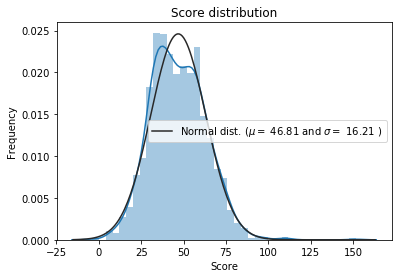

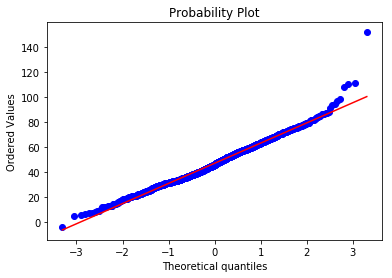

In [0]:
from scipy.stats import norm, skew
sns.distplot(data['Score'] , fit=norm)


(mu, sigma) = norm.fit(data['Score'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Score distribution')


fig = plt.figure()
res = stats.probplot(data['Score'], plot=plt)
plt.show()

## Top 10 desirable houses

In [0]:
desirableHouses = data.sort_values(['Score'],ascending = False)

In [0]:
desirableHouses.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallGrade,KitchenScore,BsmtGrade,GarageGrade,ExterGrade,FireplaceCond,TotalArea,TotalFlrSF,TotalBath,TotalPorch,YrsSinceBuilt,YrsSinceSold,YrsSinceRemod,NhdDesirability,Score
1298,1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,PConc,5,3,Gd,GLQ,5644,Unf,0,466,6110,GasA,5,...,3,4,Attchd,2008.0,Fin,2,1418,3,3,Y,214,292,0,0,0,480,4,None,None,0,1,2008,New,Partial,160000,50,5,15,9,15,12,6118.638171,5642,4.5,292,2,2,0,4.0,151.556382
691,692,60,RL,104.0,21535,Pave,None,IR1,Lvl,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,5,3,PConc,5,3,Gd,GLQ,1455,Unf,0,989,2444,GasA,5,...,2,5,Attchd,1994.0,Fin,3,832,3,3,Y,382,50,0,0,0,0,0,None,None,0,1,2007,WD,Normal,755000,60,5,15,9,15,10,2452.370316,4316,4.0,50,16,3,12,25.0,110.883703
523,524,60,RL,130.0,40094,Pave,None,IR1,Bnk,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,5,3,PConc,5,3,Gd,GLQ,2260,Unf,0,878,3138,GasA,5,...,1,4,BuiltIn,2007.0,Fin,3,884,3,3,Y,208,406,0,0,0,0,0,None,None,0,10,2007,New,Partial,184750,50,5,15,9,15,4,3146.450412,4676,4.5,406,3,3,-1,4.0,110.174504
1182,1183,60,RL,160.0,15623,Pave,None,IR1,Lvl,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,4,3,PConc,5,3,Av,GLQ,2096,Unf,0,300,2396,GasA,5,...,2,3,Attchd,1996.0,Fin,3,813,3,3,Y,171,78,0,0,0,555,5,MnPrv,None,0,7,2007,WD,Abnorml,745000,50,5,15,9,12,6,2404.406708,4476,4.5,78,14,3,11,25.0,107.654067
496,497,20,RL,91.0,12692,Pave,None,IR1,Lvl,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,4,3,PConc,4,3,No,GLQ,1231,Unf,0,1969,3200,GasA,5,...,1,4,Attchd,1992.0,RFn,2,546,3,3,Y,264,75,291,0,0,0,0,None,None,0,5,2007,WD,Normal,430000,40,4,12,9,12,4,3208.079928,3228,4.0,366,18,3,14,25.0,97.910799
440,441,20,RL,105.0,15431,Pave,None,Reg,Lvl,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,5,3,PConc,5,3,Gd,GLQ,1767,ALQ,539,788,3094,GasA,5,...,2,4,Attchd,2008.0,Fin,3,672,3,3,Y,0,72,0,0,170,0,0,None,None,0,4,2009,WD,Normal,555000,50,5,15,9,15,8,3101.784473,2402,3.0,242,2,1,1,24.0,96.587845
1169,1170,60,RL,118.0,35760,Pave,None,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,4,4,PConc,5,3,Gd,GLQ,1387,Unf,0,543,1930,GasA,5,...,1,3,Attchd,1995.0,Fin,3,807,3,3,Y,361,76,0,0,0,0,0,None,None,0,7,2006,WD,Normal,625000,50,4,15,9,16,3,1938.196437,3627,4.5,76,15,4,10,25.0,94.501964
1373,1374,20,RL,91.0,11400,Pave,None,Reg,Lvl,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,5,3,PConc,5,3,Gd,GLQ,1282,Unf,0,1351,2633,GasA,5,...,2,4,Attchd,2001.0,RFn,3,804,3,3,Y,314,140,0,0,0,0,0,None,None,0,3,2007,WD,Normal,466500,50,5,15,9,15,8,2640.876259,2633,3.5,140,9,3,5,25.0,93.738763
798,799,60,RL,104.0,13518,Pave,None,Reg,Lvl,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,860.0,5,3,PConc,5,3,No,Unf,0,Unf,0,1926,1926,GasA,5,...,2,4,BuiltIn,2009.0,Fin,3,820,3,3,Y,144,78,0,0,0,0,0,None,None,0,7,2009,New,Partial,485000,45,5,15,9,15,8,1934.052296,3140,3.5,78,2,1,0,24.0,90.990523
224,225,20,RL,103.0,13472,Pave,None,Reg,L

## Least 10 Desirable houses

In [0]:
leastDesirableHouses = data.sort_values(['Score'],ascending = True)
leastDesirableHouses.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallGrade,KitchenScore,BsmtGrade,GarageGrade,ExterGrade,FireplaceCond,TotalArea,TotalFlrSF,TotalBath,TotalPorch,YrsSinceBuilt,YrsSinceSold,YrsSinceRemod,NhdDesirability,Score
533,534,20,RL,50.0,5000,Pave,None,Reg,Low,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,Slab,0,0,None,None,0,None,0,0,0,GasA,2,...,0,0,None,0.0,None,0,0,0,0,N,0,0,0,0,0,0,0,None,None,0,1,2007,WD,Normal,39300,3,2,0,0,4,0,5.814131,334,1.0,0,64,3,57,5.0,-3.851859
636,637,30,RM,51.0,6120,Pave,None,Reg,Lvl,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,2,3,1936,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,2,BrkTil,3,2,No,Unf,0,Unf,0,264,264,Grav,2,...,1,1,None,0.0,None,0,0,0,0,N,0,0,0,0,0,0,0,None,None,0,1,2009,ConLw,Normal,60000,6,2,6,0,4,1,270.685861,800,1.0,0,74,1,59,5.0,4.906859
375,376,30,RL,65.5,10020,Pave,None,IR1,Low,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,2,BrkTil,2,1,Gd,BLQ,350,Unf,0,333,683,GasA,4,...,0,0,None,0.0,None,0,0,0,0,Y,0,0,0,0,0,0,0,None,None,0,3,2009,WD,Normal,61000,1,2,2,0,4,0,689.807935,904,1.5,0,88,1,59,4.0,5.638079
705,706,190,RM,70.0,5600,Pave,None,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,2Story,4,5,1930,1950,Hip,CompShg,VinylSd,Wd Shng,None,0.0,2,2,Slab,0,0,None,None,0,None,0,0,0,GasA,2,...,0,0,None,0.0,None,0,0,0,0,N,0,0,0,0,0,0,0,None,Othr,3500,7,2010,WD,Normal,55000,20,4,0,0,4,0,6.996681,1092,2.0,0,80,0,60,2.0,6.289967
1100,1101,30,RL,60.0,8400,Pave,None,Reg,Bnk,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3,2,No,Rec,290,Unf,0,0,290,GasA,3,...,0,0,Detchd,1930.0,Unf,1,246,3,3,N,0,0,0,0,0,0,0,None,None,0,1,2009,WD,Normal,60000,10,2,6,9,9,0,296.084499,438,1.0,0,90,1,59,9.0,6.640845
1000,1001,20,RL,74.0,10206,Pave,None,Reg,Lvl,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1952,1952,Flat,Tar&Grv,BrkComm,Brk Cmn,None,0.0,3,3,Slab,0,0,None,None,0,None,0,0,0,GasW,2,...,0,0,Detchd,1956.0,Unf,2,528,3,2,Y,0,0,0,0,0,0,0,None,None,0,7,2009,WD,Normal,82000,9,2,0,6,9,0,6.851185,944,1.0,0,58,1,57,4.0,7.258512
1321,1322,20,RL,52.0,6627,Pave,None,IR1,Lvl,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,3,6,1949,1950,Hip,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,0,0,None,None,0,None,0,0,0,Floor,3,...,0,0,Detchd,1955.0,Unf,1,287,3,2,Y,0,0,0,0,0,0,0,None,None,0,7,2008,WD,Normal,72500,18,3,0,6,9,0,6.580639,720,1.0,0,61,2,58,5.0,8.015806
1218,1219,50,RM,52.0,6240,Pave,None,Reg,Lvl,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,4,5,1947,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,3,Slab,0,0,None,None,0,None,0,0,0,GasA,4,...,0,0,None,0.0,None,0,0,0,0,N,0,0,0,0,0,0,0,None,None,0,7,2006,WD,Normal,80500,20,3,0,0,9,0,6.816736,912,1.0,0,63,4,56,5.0,8.738167
916,917,20,C (all),50.0,9000,Pave,None,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,3,CBlock,3,3,Av,BLQ,50,Unf,0,430,480,GasA,3,...,0,0,Detchd,1958.0,Unf,1,308,3,3,Y,0,0,0,0,0,0,0,None,None,0,10,2006,WD,Abnorml,35311,6,3,9,9,9,0,486.175867,480,1.0,0,61,4,56,2.0,8.811759
1035,1036,20,RL,65.5,11500,Pave,None,IR1,Lvl,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,3,1957,1957,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,4,Slab,0,0,None,None,0,None,0,0,0,GasA,5,...,0,0,Detchd,1957.0,Unf,1,290,3,3,N,186,0,0,0,0,0,0,None,None,0,1,2009,WD,Norm

## Part 4 - Pairwise Distance Function

### Pairwise distance function taking all Columns

In [0]:
from sklearn.metrics.pairwise import euclidean_distances
numericColList=[]
numericList = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for colName in data.columns:
  if data[colName].dtype in numericList:
    numericColList.append(colName)
result = data.copy()
for feature_name in numericColList:
  result[feature_name] = (result[feature_name])*10 / (data[feature_name].max())
pDistFuncAll=pd.DataFrame(euclidean_distances(result[numericColList]))
pDistFuncAll  = pDistFuncAll.sort_values(0)
pDistFuncAll.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,0.000000,14.650884,7.440112,16.882204,9.676806,10.402708,12.758314,13.952584,18.258567,18.472193,12.768417,16.211637,14.500906,14.302905,14.560282,13.819241,14.838268,19.161694,7.590565,14.439147,14.401547,19.004955,14.540235,14.742905,15.690533,15.155569,14.655245,13.934865,18.098865,21.112201,20.329681,11.496673,9.806757,16.984491,13.597889,13.913094,11.135082,15.146431,12.922734,26.843060,...,16.379116,17.330274,13.600317,24.300316,17.737221,16.916479,15.090630,17.984419,20.738143,16.064607,15.967804,15.281702,17.223028,13.283103,18.721250,17.673420,16.848156,18.370358,16.682124,15.747848,20.233168,15.424996,16.670008,25.505305,14.306416,17.537750,18.423773,12.786951,19.824726,22.947117,21.606841,17.707479,15.367851,21.907794,12.991762,14.135668,18.407974,20.483512,18.094445,17.731785
56,4.535790,14.711303,8.494015,17.747576,9.632009,11.296633,13.240896,13.862420,18.475263,18.828241,13.529469,17.079781,15.022204,14.829823,15.215078,14.941380,14.310183,20.471761,9.159537,14.476234,15.326686,19.642250,14.493299,16.125871,15.441263,14.340966,14.406463,13.107294,19.456849,21.427487,20.956275,12.511915,10.270104,16.716167,13.585402,14.946975,10.879575,15.034762,12.889929,27.242552,...,17.342103,16.734147,13.449063,24.985367,18.264644,16.857833,14.708844,18.143821,20.295338,16.201859,17.185133,15.067937,18.022824,13.523543,19.510676,17.800881,17.604752,18.234186,16.778233,16.393225,20.002104,15.399785,16.351363,25.287876,14.555351,18.286584,17.528276,13.444815,20.621436,23.720814,21.586012,17.152922,16.918229,22.746801,12.589503,14.931861,17.318455,19.854319,17.508141,17.589098
94,4.927921,14.547523,8.780415,15.907852,10.780713,10.961249,13.318497,14.036398,18.123983,18.400197,12.783592,16.788881,14.361137,14.715340,13.952300,13.481555,15.873720,18.419388,7.789818,14.923420,14.156391,18.638832,15.134573,14.126668,16.419676,16.459359,15.625691,15.649770,17.092189,20.876425,20.104740,11.835620,11.114375,17.534122,14.555154,13.959251,11.693872,16.038649,13.892001,26.818345,...,14.868868,17.586419,14.039956,23.200781,17.078691,16.803729,15.205114,17.541313,21.071820,15.702097,15.381307,15.346534,16.753512,13.549327,17.692776,17.797504,16.043132,18.858512,16.711082,14.886232,20.162387,15.801390,17.825746,25.254865,14.167500,16.854926,18.781608,12.890684,19.241400,22.266533,21.708407,18.403828,14.496532,21.366540,13.642961,13.618615,19.052542,21.370412,18.640686,17.525671
348,5.003644,14.637006,8.717492,17.123613,10.045966,11.626258,13.368489,14.840776,19.365623,19.521266,14.318483,16.609926,15.747806,15.183793,15.944319,15.217549,15.952823,20.173217,9.112255,15.664022,14.827639,20.378006,15.392199,16.653712,17.007042,15.283733,15.790934,14.032237,19.200221,21.860726,21.581575,13.135193,10.691573,18.237823,13.330491,14.113241,12.003835,16.438325,14.122008,27.598338,...,15.764646,16.630454,11.875074,24.693479,17.445344,16.830065,13.358353,17.735262,20.401971,15.152260,15.226068,14.508196,16.883320,12.484490,18.356112,17.508048,16.509436,17.231188,16.691682,14.815165,19.424160,13.976613,15.900304,25.351885,13.351655,17.445349,18.101058,12.086107,19.727599,22.748101,21.462497,16.723184,15.205669,21.447804,11.197758,13.163700,17.596350,19.605113,17.630792,17.861522
139,5.397042,14.356614,9.099006,17.532092,10.691963,9.673160,13.636484,12.731674,17.841519,17.962935,12.353319,18.158629,13.647055,15.509430,14.032569,14.474394,13.946146,19.592356,8.027883,13.647858,15.876202,19.047909,15.085534,14.753581,14.004085,16.104517,13.306452,14.170901,18.004816,20.511058,19.694275,11.759153,11.275611,15.773455,15.023008,15.692161,9.367208,15.017920,12.172884,26.482370,...,16.626192,15.869686,13.344465,23.640306,16.807145,16.628725,14.783686

In [0]:
idList =[0,348,56,94,139]
dic ={}
for id in idList:
  temp = trainDatadf['SalePrice'].iloc[id]
  dic.update({id:temp})

dic

{0: 208500, 56: 172500, 94: 204750, 139: 231500, 348: 154000}

In [0]:
numericColList=['NhdDesirability','OverallGrade','GarageGrade','ExterGrade',
                  'BsmtGrade','TotalArea','FireplaceCond','CentralAir','KitchenScore',
                 'TotalBath','TotalFlrSF']
result = data.copy()
for feature_name in numericColList:
  result[feature_name] = (result[feature_name])*10 / (data[feature_name].max())
pDistFuncAll=pd.DataFrame(euclidean_distances(result[numericColList]))
pDistFuncAll  = pDistFuncAll.sort_values(0)
pDistFuncAll.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,0.000000,4.522047,2.007262,4.339121,4.613052,3.328220,3.842536,4.532294,6.526544,7.066401,5.183560,7.050864,5.143142,3.820272,4.324950,6.784808,5.024283,8.176978,3.104103,5.562952,4.926187,7.673922,3.994800,6.760311,5.215990,5.292827,4.970639,5.024450,6.989913,12.234196,12.654739,5.400794,3.146653,5.187548,5.321813,4.953968,4.044167,5.407309,4.217458,13.480539,...,3.561585,3.870712,2.982130,6.674632,4.974448,5.342344,5.736416,4.464551,7.055190,3.898001,4.075600,3.647041,5.361477,2.679822,4.385229,5.259471,5.819627,5.408034,4.767977,3.635436,4.873348,3.590696,4.660465,12.600878,2.713985,5.142330,5.237887,2.261984,12.035001,7.552908,5.397471,4.346485,5.572582,6.282176,2.088262,3.155720,4.657577,7.752086,4.412994,5.196654
1240,0.112548,4.534763,2.001120,4.342012,4.590399,3.350455,3.828744,4.514228,6.524625,7.082175,5.205635,7.032481,5.171758,3.819729,4.338777,6.808959,5.048889,8.194799,3.134763,5.573906,4.898164,7.691162,3.975196,6.776714,5.236947,5.287764,5.000860,5.013278,6.986959,12.254483,12.662122,5.413061,3.167174,5.181293,5.318185,4.923914,4.068822,5.416286,4.243531,13.493302,...,3.581464,3.898312,3.036642,6.663950,4.986587,5.353592,5.719456,4.471214,7.080171,3.901030,4.073708,3.684077,5.390596,2.674368,4.406284,5.260078,5.847043,5.386784,4.786508,3.642947,4.861509,3.636096,4.647606,12.611770,2.720036,5.172335,5.252493,2.221761,12.042879,7.581995,5.395320,4.341122,5.598676,6.296320,2.120635,3.159062,4.633643,7.735215,4.436701,5.208019
1366,0.144505,4.545110,2.001487,4.342170,4.585793,3.358323,3.836460,4.510952,6.525009,7.089486,5.216342,7.028362,5.183517,3.829601,4.349673,6.818138,5.060211,8.195725,3.151580,5.580149,4.891412,7.696267,3.981546,6.784739,5.247439,5.293915,5.013115,5.019141,6.991271,12.260721,12.664111,5.421981,3.182321,5.185287,5.324780,4.915885,4.081958,5.424696,4.256501,13.494602,...,3.587065,3.912305,3.057457,6.658773,4.993466,5.362434,5.717019,4.474854,7.089305,3.911245,4.071652,3.700072,5.399772,2.674663,4.418156,5.265712,5.857773,5.390560,4.794545,3.641236,4.854179,3.653498,4.645090,12.616470,2.734928,5.183524,5.261988,2.216593,12.044587,7.591497,5.395249,4.349009,5.605659,6.304546,2.143432,3.162639,4.633461,7.731240,4.448920,5.217077
1410,0.271681,4.549479,2.002674,4.352369,4.562825,3.385770,3.802821,4.492987,6.524732,7.103629,5.234884,7.009761,5.210706,3.813737,4.354954,6.842384,5.081781,8.226652,3.174096,5.589453,4.863631,7.717372,3.940743,6.798542,5.264553,5.276708,5.042049,4.992476,6.980479,12.283321,12.674176,5.427817,3.191603,5.170843,5.309006,4.887390,4.100805,5.426119,4.277824,13.515082,...,3.615045,3.934436,3.110478,6.655687,5.003894,5.366783,5.697973,4.483682,7.114905,3.900520,4.078981,3.733794,5.433200,2.674064,4.433306,5.259217,5.884677,5.350981,4.813353,3.664300,4.855173,3.697982,4.634149,12.626566,2.721863,5.214250,5.270635,2.169941,12.056192,7.622937,5.396358,4.328539,5.638634,6.314403,2.159278,3.168314,4.598639,7.714574,4.467695,5.221282
1338,0.285082,4.563440,2.004423,4.351402,4.561326,3.392316,3.820356,4.492417,6.525757,7.111445,5.246647,7.007920,5.222307,3.830917,4.369519,6.850907,5.093835,8.222643,3.193665,5.596806,4.860010,7.720875,3.957703,6.807411,5.276284,5.288834,5.054016,5.005983,6.988774,12.287963,12.675293,5.439470,3.211396,5.179521,5.321472,4.882133,4.115934,5.437887,4.292246,13.513345,...,3.618377,3.950139,3.129691,6.649595,5.011964,5.378607,5.698618,4.487698,7.123103,3.917198,4.075553,3.750075,5.440132,2.675674,4.447362,5.268668,5.894879,5.363960,4.821483,3.658577,4.845547,3.714158,4.633326,12.631386,2.745651,5.224428,5.282567,2.172654,12.056656,7.630543,5.396602,4.343768,5.642655,6.324299,2.188375,3.173088,4.605394,7.712542,4.481548,5.233442


In [0]:
idList =[0,1240,1366,1410,1338]
dic ={}
for id in idList:
  temp = trainDatadf['SalePrice'].iloc[id]
  dic.update({id:temp})

dic

{0: 208500, 1240: 224900, 1338: 200000, 1366: 193000, 1410: 230000}

### Pairwise distance for houses on Engineered Features performs better than on the original column list. We can see that for engineered features the prices of similar houses are in close range which is not the case in original features.

## Part 5 - Clustering

Now that we have the Pairwise distance function we can use the output of that function to cluster the houses by their distances. We use KMeans to form the cluster and PCA for dimensionality reduction

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly_express as px
init_notebook_mode(connected=True)
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [0]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallGrade,KitchenScore,BsmtGrade,GarageGrade,ExterGrade,FireplaceCond,TotalArea,TotalFlrSF,TotalBath,TotalPorch,YrsSinceBuilt,YrsSinceSold,YrsSinceRemod,NhdDesirability,Score
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,...,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,None,None,0,2,2008,WD,Normal,208500,35,4,12,9,12,0,863.444833,1710,3.5,61,7,2,5,15.0,54.184448
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,...,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal,181500,48,3,12,9,9,3,1269.141245,1262,2.5,0,34,3,31,22.0,55.061412
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,...,1,3,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,None,None,0,9,2008,WD,Normal,223500,35,4,12,9,12,3,927.488294,1786,3.5,42,9,2,6,15.0,56.034883
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,...,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,None,None,0,2,2006,WD,Abnorml,140000,35,4,12,9,9,4,763.448916,1717,2.0,307,95,4,36,20.0,43.554489
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,...,1,3,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,None,None,0,12,2008,WD,Normal,250000,40,4,12,9,12,3,1152.695758,2198,3.5,84,10,2,8,25.0,68.106958


In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numericColDf = data.select_dtypes(include=numerics)
numericColDf.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,OverallGrade,KitchenScore,BsmtGrade,GarageGrade,ExterGrade,FireplaceCond,TotalArea,TotalFlrSF,TotalBath,TotalPorch,YrsSinceBuilt,YrsSinceSold,YrsSinceRemod,NhdDesirability,Score
0,1,65.0,8450,7,5,2003,2003,196.0,4,3,4,3,706,0,150,856,5,1,856,854,0,7.444833,1,0,2,1,3,1,4,8,0,0,2003.0,2,548,3,3,0,61,0,0,0,0,0,0,208500,35,4,12,9,12,0,863.444833,1710,3.5,61,7,2,5,15.0,54.184448
1,2,80.0,9600,6,8,1976,1976,0.0,3,3,4,3,978,0,284,1262,5,1,1262,0,0,7.141245,0,1,2,0,3,1,3,6,1,3,1976.0,2,460,3,3,298,0,0,0,0,0,0,0,181500,48,3,12,9,9,3,1269.141245,1262,2.5,0,34,3,31,22.0,55.061412
2,3,68.0,11250,7,5,2001,2002,162.0,4,3,4,3,486,0,434,920,5,1,920,866,0,7.488294,1,0,2,1,3,1,4,6,1,3,2001.0,2,608,3,3,0,42,0,0,0,0,0,0,223500,35,4,12,9,12,3,927.488294,1786,3.5,42,9,2,6,15.0,56.034883
3,4,60.0,9550,7,5,1915,1970,0.0,3,3,3,4,216,0,540,756,4,1,961,756,0,7.448916,1,0,1,0,3,1,4,7,1,4,1998.0,3,642,3,3,0,35,272,0,0,0,0,0,140000,35,4,12,9,9,4,763.448916,1717,2.0,307,95,4,36,20.0,43.554489
4,5,84.0,14260,8,5,2000,2000,350.0,4,3,4,3,655,0,490,1145,5,1,1145,1053,0,7.695758,1,0,2,1,4,1,4,9,1,3,2000.0,3,836,3,3,192,84,0,0,0,0,0,0,250000,40,4,12,9,12,3,1152.695758,2198,3.5,84,10,2,8,25.0,68.106958


In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
plt.figure(figsize=(10,5))
pca = PCA(n_components=30).fit(numericColDf)
#Plotting the Cumulative Summation of the Explained Variance
expvar=np.cumsum(pca.explained_variance_ratio_)
configure_plotly_browser_state()
init_notebook_mode(connected=True)
dataScatter = [go.Scatter(y=expvar)]
layout = {'title': 'Variance to determine number of components for PCA'}
print("As we can see after 6 the graph saturates, so we take n_components for PCA to be 6")
iplot({'data':dataScatter,'layout':layout});

As we can see after 6 the graph saturates, so we take n_components for PCA to be 6


<Figure size 720x360 with 0 Axes>

PCA to reduce dimensionality of data

In [0]:
pca = PCA(n_components=6)
XPCA = pca.fit_transform(numericColDf)

KMeans to form the clusters

In [0]:
Nc = range(1,20)
kmeans = [KMeans(i) for i in Nc]
score = [kmeans[i].fit(XPCA).score(XPCA) for i in range(len(kmeans))]
n_clusters=8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
Xkmeans = kmeans.fit_predict(XPCA)

In [0]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallGrade,KitchenScore,BsmtGrade,GarageGrade,ExterGrade,FireplaceCond,TotalArea,TotalFlrSF,TotalBath,TotalPorch,YrsSinceBuilt,YrsSinceSold,YrsSinceRemod,NhdDesirability,Score
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,...,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,None,None,0,2,2008,WD,Normal,208500,35,4,12,9,12,0,863.444833,1710,3.5,61,7,2,5,15.0,54.184448
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,...,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal,181500,48,3,12,9,9,3,1269.141245,1262,2.5,0,34,3,31,22.0,55.061412
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,...,1,3,Attchd,2001.0,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,None,None,0,9,2008,WD,Normal,223500,35,4,12,9,12,3,927.488294,1786,3.5,42,9,2,6,15.0,56.034883
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,...,1,4,Detchd,1998.0,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,None,None,0,2,2006,WD,Abnorml,140000,35,4,12,9,9,4,763.448916,1717,2.0,307,95,4,36,20.0,43.554489
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,...,1,3,Attchd,2000.0,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,None,None,0,12,2008,WD,Normal,250000,40,4,12,9,12,3,1152.695758,2198,3.5,84,10,2,8,25.0,68.106958


In [0]:
XTSNE = TSNE(n_components=2).fit_transform(XPCA)
y = data.SalePrice.reset_index(drop=True)

Code to generate Plots

In [0]:
XTSNEdf = pd.concat([pd.DataFrame(XTSNE),pd.DataFrame(Xkmeans),pd.DataFrame(y),pd.DataFrame(np.expm1(y))],axis=1)
XTSNEdf.columns = ['x1','x2','cluster','logprice','price']
configure_plotly_browser_state()
init_notebook_mode(connected=True)
px.scatter(XTSNEdf,x='x1',y='x2',color='cluster',title="TSNE visualization of House Clusters",width=800,height=500)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

overflow encountered in expm1



### Analysis of clusters

We have clustered houses based on the our distance scoring function and now we can compare the houses in the same cluster based on their Neighborhood.
House # 15,29,51,146,149,1323 and others in the list belongs to same cluster (cluster no. 7) and have Neighborhood BrkSide.

House # 559,1108,1261,1431 and others in the list belongs to same cluster (cluster no. 4) and have Neighborhood Gilbert.

## Part 6 - Linear Regression

Encoding the non-numeric columns

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
def encoding(data,cols):
    df = data
    le = LabelEncoder()
    for col in cols:
        le.fit(np.array(list(df[col].values.astype(str))))
        df[col]=le.transform(df[col].astype(str))
    return df

In [0]:
nonNumericColsTrain = pd.DataFrame(data.select_dtypes([object])).columns.tolist()
nonNumericColsTest = pd.DataFrame(testDataProcessed.select_dtypes([object])).columns.tolist()
train_data = encoding(data,nonNumericColsTrain)
test_data = encoding(data,nonNumericColsTest)

In [0]:
#Calculation RMSE for different feature pairs and finding the feature which is most important
def linearRegression(colList):
  rmseScore= 9999999999
  col =colList[0]
  for col1 in range(len(colList)):
      for col2 in range(col1,len(colList)):
          X_train, X_test, y_train, y_test = train_test_split(data[[colList[col1],colList[col2]]],data['SalePrice'], test_size=0.2)
          lr = LinearRegression()
          lr.fit(X_train,y_train)
          preds=lr.predict(X_test)
          score = mean_squared_error(preds,y_test)
          if (score <= rmseScore and score > 0.0):
              rmseScore=score
              col=[colList[col1],colList[col2]]
  print(col)

In [0]:
# Linear Regression on train DataFrame
colList=[]
for i in data.columns:
    if data[i].dtypes in ['int16','int32','int64','float16','float32','float64']:
        colList.append(i)
linearRegression(colList)

['BsmtFinSF1', 'SalePrice']


In [0]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallGrade,KitchenScore,BsmtGrade,GarageGrade,ExterGrade,FireplaceCond,TotalArea,TotalFlrSF,TotalBath,TotalPorch,YrsSinceBuilt,YrsSinceSold,YrsSinceRemod,NhdDesirability,Score
0,1,14,3,65.0,8450,1,1,3,3,4,0,20,2,2,0,5,7,5,2003,2003,1,1,4,5,1,196.0,4,3,2,4,3,3,2,706,6,0,150,856,1,5,...,0,0,1,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,4,1,0,6,2,8,4,208500,35,4,12,9,12,0,863.444833,1710,3.5,61,7,2,5,15.0,54.184448
1,2,9,3,80.0,9600,1,1,3,3,2,0,17,1,2,0,2,6,8,1976,1976,1,1,13,14,2,0.0,3,3,1,4,3,1,0,978,6,0,284,1262,1,5,...,1,3,1,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,4,1,0,9,1,8,4,181500,48,3,12,9,9,3,1269.141245,1262,2.5,0,34,3,31,22.0,55.061412
2,3,14,3,68.0,11250,1,1,0,3,4,0,20,2,2,0,5,7,5,2001,2002,1,1,4,5,1,162.0,4,3,2,4,3,2,2,486,6,0,434,920,1,5,...,1,3,1,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,4,1,0,3,2,8,4,223500,35,4,12,9,12,3,927.488294,1786,3.5,42,9,2,6,15.0,56.034883
3,4,2,3,60.0,9550,1,1,0,3,0,0,21,2,2,0,5,7,5,1915,1970,1,1,5,7,2,0.0,3,3,0,3,4,3,0,216,6,0,540,756,1,4,...,1,4,5,1998.0,3,3,642,3,3,2,0,35,272,0,0,0,0,4,1,0,6,0,8,0,140000,35,4,12,9,9,4,763.448916,1717,2.0,307,95,4,36,20.0,43.554489
4,5,14,3,84.0,14260,1,1,0,3,2,0,7,2,2,0,5,8,5,2000,2000,1,1,4,5,1,350.0,4,3,2,4,3,0,2,655,6,0,490,1145,1,5,...,1,3,1,2000.0,2,3,836,3,3,2,192,84,0,0,0,0,0,4,1,0,5,2,8,4,250000,40,4,12,9,12,3,1152.695758,2198,3.5,84,10,2,8,25.0,68.106958


### Analysis on Single Variable Linear Regression Model

The most important features after multiple trials of the above function are as follows (based on least RMSE error):

OverallQual, KitchenQual, GrLivArea, TotalFlrSF

In above model we have used the simple linear regression model on one or few colums and that's give a bad RMSE score as:

* The number of features used to predict are less.

* Input dataset is very small for the model to learn

## Part 7 - External Dataset

### External Dataset Link: https://www.cityofames.org/government/departments-divisions-a-h/city-assessor/reports

About Dataset: This dataset contains house data IOWA state with features similar to our data, but these houses are built in recent years(2016-2019) with the latest year being 2019. Now with the help of this dataset we can see the trend of the Sale Price in recent years. 

The data report had nearly 22000 records, but for nearly 19000 records, sale price was missing, so I have dropped those records. I have taken the common columns in the two datasets and have below mapped the different column values in the external dataset with that in our original dataset so that these two datasets are consistent.

In [0]:
#Reading External Dataset
externalData = pd.read_csv('finalExternalData.csv')
externalDataColList = externalData.columns.tolist()


In [0]:
#Mapping the external Dataset values with the values in our original Dataset

#BuildingType
BldgTypeMap = {}
BldgTypeMap['1FamDet'] = '1Fam'
BldgTypeMap['2FmConv'] = '2FmCon'
BldgTypeMap['Duplex'] = 'Duplx'
BldgTypeMap['Twnhs-E'] = 'TwnhsE'
BldgTypeMap['Twnhs-I'] = 'TwnhsI'

#HouseStyle
HouseStyleMap ={}
HouseStyleMap['1-Story'] = '1Story'
HouseStyleMap['1.5 Fin'] = '1.5Fin'
HouseStyleMap['1.5 Unf'] = '1.5Unf'
HouseStyleMap['2-Story'] = '2Story'
HouseStyleMap['2.5 Fin'] = '2.5Fin'
HouseStyleMap['2.5 Unf'] = '2.5Unf'
HouseStyleMap['S/Foyer'] = 'SFoyer'
HouseStyleMap['S/Level'] = 'SLvl'

#GarageType
GarageTypeMap = {}
GarageTypeMap['2 Types'] = '2Types'
GarageTypeMap['Attachd'] = 'Attchd'
GarageTypeMap['Basment'] = 'Basment'
GarageTypeMap['Detached'] = 'Detchd'
GarageTypeMap['None'] = 'NA'

#SaleType
SaleTypeMap ={}
SaleTypeMap['WRDCash'] = 'CWD'
SaleTypeMap['WRDConv'] = 'VWD'
SaleTypeMap['NewSold'] = 'New'
SaleTypeMap['COD/Est'] = 'COD'
SaleTypeMap['CtrLwDn'] = 'ConLw'
SaleTypeMap['CtrLInt'] = 'ConLI'
SaleTypeMap['CtrLD&I'] = 'ConLD'
SaleTypeMap['Other'] = 'Oth'


In [0]:
#Mapping
def colMap(col,data,mapDict):
  data[col] = data[col].map(mapDict)
  return data

externalData = colMap('BldgType',externalData,BldgTypeMap)
externalData = colMap('HouseStyle',externalData,HouseStyleMap)
externalData = colMap('GarageType',externalData,GarageTypeMap)
externalData = colMap('SaleType',externalData,SaleTypeMap)
externalData['GarageType'] = externalData['GarageType'].fillna('None') 
externalData['HouseStyle'] = externalData['HouseStyle'].fillna('None') 
externalData['SaleType'] = externalData['SaleType'].fillna('None') 
externalData['BldgType'] = externalData['BldgType'].fillna('None') 
externalData['SalePrice'] = np.log(externalData['SalePrice'])
externalData = externalData.fillna(0)

In [0]:
externalData.head()

,LotArea,BldgType,YearBuilt,HouseStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Heating,CentralAir,GrLivArea,TotalBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarageYrBlt,GarageArea,YrSold,MoSold,SalePrice,SaleType,SaleCondition,BedroomAbvGr
0,10015,1Fam,2016,2Story,CompShg,VinylSd,VinylSd,BrkFace,GasA,Y,2243,1142,9,1,0,Attchd,2016,647,2017,10,12.808748,VWD,Normal,4
1,10015,1Fam,2016,2Story,CompShg,VinylSd,VinylSd,BrkFace,GasA,Y,2243,1142,9,1,0,Attchd,2016,647,2016,5,11.225243,VWD,Normal,4
2,14904,1Fam,2018,2Story,CompShg,VinylSd,VinylSd,Stone,GasA,Y,2456,1604,8,1,0,Attchd,2018,744,2019,1,12.880292,VWD,Normal,4
3,14904,1Fam,2018,2Story,CompShg,VinylSd,VinylSd,Stone,GasA,Y,2456,1604,8,1,0,Attchd,2018,744,2018,1,11.225243,VWD,Normal,4
4,13915,1Fam,2017,1Story,CompShg,CemntBd,CmentBd,Stone,GasFWA,Yes,1824,1824,7,1,0,Attchd,2017,1057,2018,6,13.128176,New,Partial,2


In [0]:
#Concatenating original and External Dataset and taking common columns
originalDF = trainDatadf[externalDataColList]
originalDF_externalDF = pd.concat([originalDF,externalData], axis=0)
nonNumericExtList = pd.DataFrame(originalDF_externalDF.select_dtypes([object])).columns.tolist()
originalDF_externalDF = encoding(originalDF_externalDF, nonNumericExtList)
originalDF_externalDF.head()
originalDF_externalDF.drop(['GarageYrBlt'], axis=1,inplace= True)

In [0]:
#Running Linear Regeression to find RMSE
trainingSet, testSet = train_test_split(originalDF_externalDF, test_size=0.2)
xlabel = (np.log(trainingSet['SalePrice']))
Xtrain = trainingSet.drop('SalePrice',axis =1)
Ytest = testSet.drop('SalePrice', axis =1)
lr = LinearRegression()
lr.fit(Xtrain, XLabel)
#predict on test data split
pred = lr.predict(Ytest)
score = mean_squared_error(np.log(testSet['SalePrice']), (pred))
score = np.sqrt(score)
print(score)

4.423578887006087


On running the Linear Regression model on this combined Data with nearly 4000 records we acheived a rmse score of 4.42

## Part 8 - Permutation Test

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
def PTestFig(permutation_scores,colName):
  print("P test for "+colName+ " vs Sales Price")
  plt.figure(figsize=(12,5))
  plt.hist(permutation_scores, 20, label='Permutation scores', edgecolor='black')
  ylim = plt.ylim()
  plt.plot(2 * [score], ylim, '--g', linewidth=3, label='Classification Score (pvalue %s)' % pvalue)
  plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Luck')
  plt.ylim(ylim)
  plt.legend()
  plt.xlabel('Score')
  plt.show();

In [0]:
def custom_rmse(y_true, y_pred):
    error = sqrt(mean_squared_error(y_true, y_pred))
    rmse = round(error, 2)
    return rmse

P test for LotArea vs Sales Price


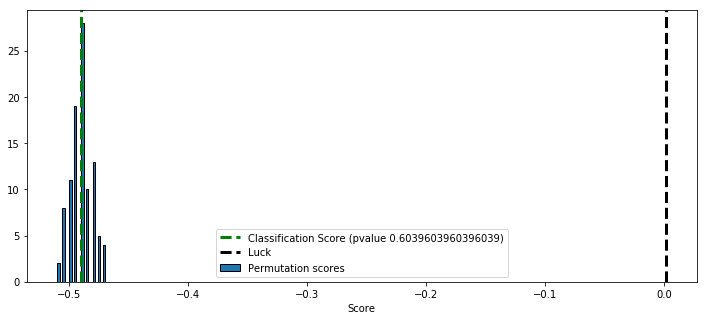

Classification score -0.49 (pvalue : 0.6039603960396039)
P test for BsmtUnfSF vs Sales Price


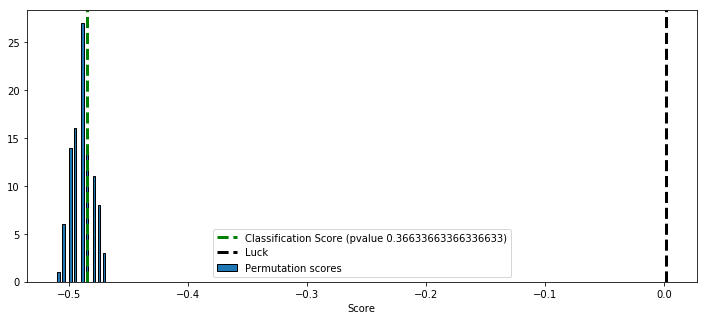

Classification score -0.485 (pvalue : 0.36633663366336633)
P test for EnclosedPorch vs Sales Price


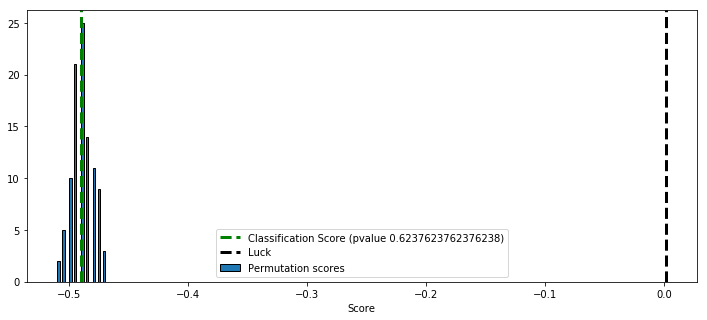

Classification score -0.49 (pvalue : 0.6237623762376238)
P test for BedroomAbvGr vs Sales Price


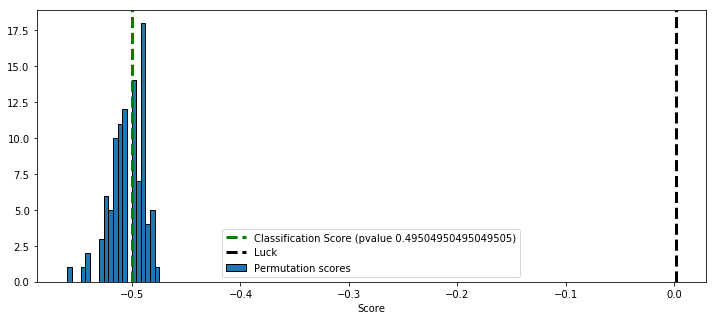

Classification score -0.5 (pvalue : 0.49504950495049505)
P test for KitchenAbvGr vs Sales Price


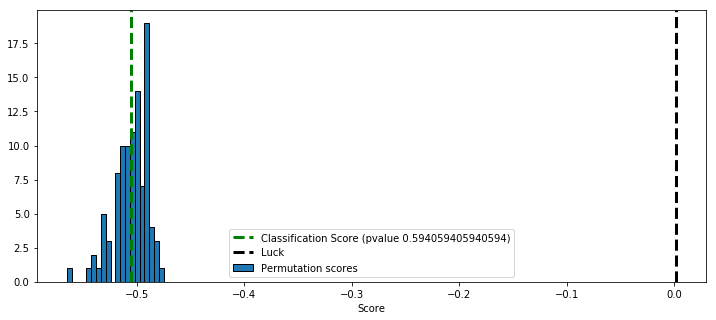

Classification score -0.505 (pvalue : 0.594059405940594)
P test for OverallQual vs Sales Price


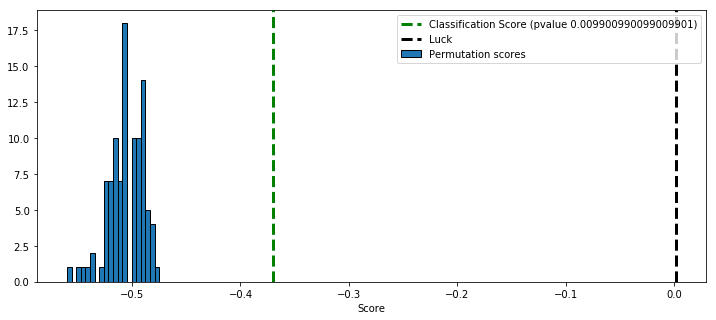

Classification score -0.37 (pvalue : 0.009900990099009901)
P test for Fireplaces vs Sales Price


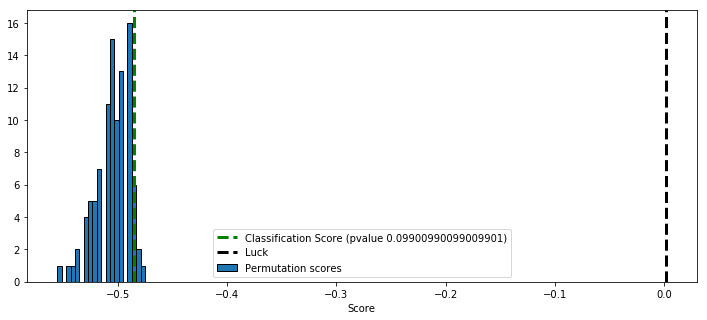

Classification score -0.485 (pvalue : 0.09900990099009901)
P test for GarageArea vs Sales Price


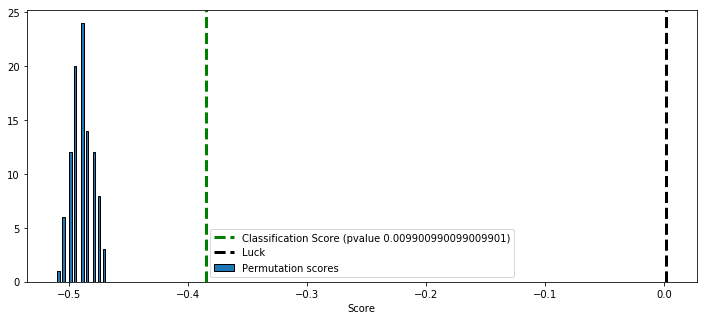

Classification score -0.385 (pvalue : 0.009900990099009901)
P test for YearRemodAdd vs Sales Price


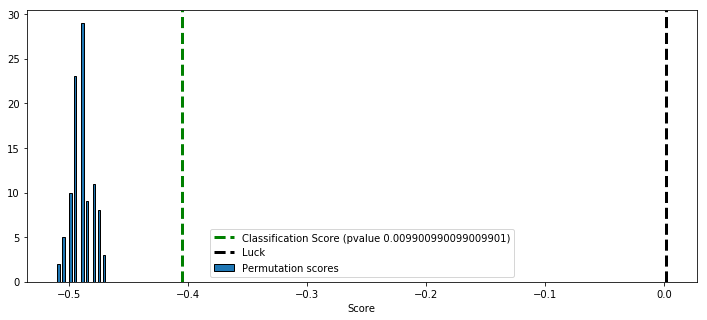

Classification score -0.405 (pvalue : 0.009900990099009901)
P test for GrLivArea vs Sales Price


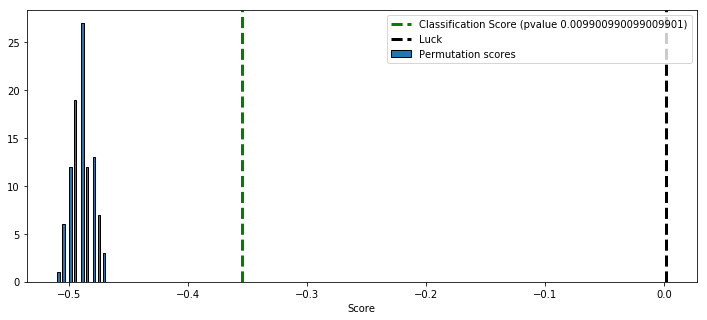

Classification score -0.355 (pvalue : 0.009900990099009901)


In [0]:
colList = ['LotArea','BsmtUnfSF','EnclosedPorch','BedroomAbvGr','KitchenAbvGr','OverallQual','Fireplaces','GarageArea','YearRemodAdd','GrLivArea']
for colName in colList:
  X = trainDatadf[[colName]]
  y = np.log(trainDatadf['SalePrice'])
  n_classes = np.unique(y).size
  random = np.random.RandomState(seed=0)
  E = random.normal(size=(len(X), 2200))
  X = np.c_[X, E]

  model = LinearRegression()
  cv = KFold(2)
  score = make_scorer(custom_rmse, greater_is_better=False)
  score, permutation_scores, pvalue = permutation_test_score (
      model, X, y, 
      scoring=score, 
      cv=cv, 
      n_permutations=100, 
      n_jobs=1,
      verbose=0
  )
  PTestFig(permutation_scores,colName)
  print("Classification score %s (pvalue : %s)" % (score, pvalue))

### Analysis of Permutation test
Permutation tests is used to test the null hypothesis that two different features come from the same distribution, i.e are correlated.

So if our classification Score (green dotted line) is on the right and our permutation scores are on left, then the Variables (Features, SalePrice) are correlated.

If Classification Score and Permutation score intersect then the features are not correlated.

In our analysis I have done P-Test on 10 different Variables and have found their P-Test score with SalePrice Feature.

I have taken following features: {'LotArea','BsmtUnfSF','EnclosedPorch','BedroomAbvGr','KitchenAbvGr','OverallQual','Fireplaces','GarageArea','YearRemodAdd','GrLivArea'}

As per the results obtained from P-Test following features are well correlated with Sales Price:
* OverallQual
* GarageArea
* YearRemodAdd
* GrLivArea

Following features are not well correlated with Sales Price:
* LotArea
* BsmtUnfSF
* BedroomAbvGr
* KitchenAbvGr
* Fireplaces
* Enclosed Porch


## Part 9 - Final Result

In [0]:
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallGrade,KitchenScore,BsmtGrade,GarageGrade,ExterGrade,FireplaceCond,TotalArea,TotalFlrSF,TotalBath,TotalPorch,YrsSinceBuilt,YrsSinceSold,YrsSinceRemod,NhdDesirability,Score
0,1,14,3,65.0,8450,1,1,3,3,4,0,20,2,2,0,5,7,5,2003,2003,1,1,4,5,1,196.0,4,3,2,4,3,3,2,706,6,0,150,856,1,5,...,0,0,1,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,4,1,0,6,2,8,4,208500,35,4,12,9,12,0,863.444833,1710,3.5,61,7,2,5,15.0,54.184448
1,2,9,3,80.0,9600,1,1,3,3,2,0,17,1,2,0,2,6,8,1976,1976,1,1,13,14,2,0.0,3,3,1,4,3,1,0,978,6,0,284,1262,1,5,...,1,3,1,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,4,1,0,9,1,8,4,181500,48,3,12,9,9,3,1269.141245,1262,2.5,0,34,3,31,22.0,55.061412
2,3,14,3,68.0,11250,1,1,0,3,4,0,20,2,2,0,5,7,5,2001,2002,1,1,4,5,1,162.0,4,3,2,4,3,2,2,486,6,0,434,920,1,5,...,1,3,1,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,4,1,0,3,2,8,4,223500,35,4,12,9,12,3,927.488294,1786,3.5,42,9,2,6,15.0,56.034883
3,4,2,3,60.0,9550,1,1,0,3,0,0,21,2,2,0,5,7,5,1915,1970,1,1,5,7,2,0.0,3,3,0,3,4,3,0,216,6,0,540,756,1,4,...,1,4,5,1998.0,3,3,642,3,3,2,0,35,272,0,0,0,0,4,1,0,6,0,8,0,140000,35,4,12,9,9,4,763.448916,1717,2.0,307,95,4,36,20.0,43.554489
4,5,14,3,84.0,14260,1,1,0,3,2,0,7,2,2,0,5,8,5,2000,2000,1,1,4,5,1,350.0,4,3,2,4,3,0,2,655,6,0,490,1145,1,5,...,1,3,1,2000.0,2,3,836,3,3,2,192,84,0,0,0,0,0,4,1,0,5,2,8,4,250000,40,4,12,9,12,3,1152.695758,2198,3.5,84,10,2,8,25.0,68.106958


In [0]:
nonNumericColsx_train = pd.DataFrame(data.select_dtypes([object])).columns.tolist()
x_train = encoding(data,nonNumericColsx_train)
x_train['SalePrice'] = np.log(x_train['SalePrice'])

In [0]:
testDataProcessed.head()
nonNumericColsx_test = pd.DataFrame(testDataProcessed.select_dtypes([object])).columns.tolist()
x_test = encoding(testDataProcessed,nonNumericColsx_test)
x_test = x_test.fillna(0)

In [0]:
trainCols = x_train.columns.tolist()
testCols = x_test.columns.tolist()
dropList = list(set(trainCols)-set(testCols))
dropList

['SalePrice', 'Score', 'NhdDesirability']

In [0]:
from catboost import CatBoostRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
fields2=x_test.columns
x_train.drop(['Score'], axis=1,inplace= True)
x_train.drop(['NhdDesirability'], axis=1,inplace= True)
X_train, X_test, y_train, y_test = train_test_split(x_train.drop("SalePrice", axis = 1), x_train['SalePrice'], test_size=0.3)
test_Id = x_test['Id']

## Linear Regression Model

In [0]:
lr = LinearRegression()
lr.fit(X_train,y_train)
preds=lr.predict(x_test)
preds = np.exp(preds)
output=pd.DataFrame({'Id': test_Id, 'SalePrice': preds[:]})
output.to_csv('submissionLR.csv', index=False)

### Kaggle Score -  0.13432

## CatBoostRegressor Model

In [0]:
clf = CatBoostRegressor(iterations=5000);
clf.fit(X_train,y_train,verbose=False)

In [0]:
preds=clf.predict(x_test)
preds = np.exp(preds)
output=pd.DataFrame({'Id': test_Id, 'SalePrice': preds[:]})
output.to_csv('submissionCatBoost.csv', index=False)

###Kaggle Score - 0.12891

## Kaggle Results

Kaggle Link: https://www.kaggle.com/amanagarwal0307

Highest Rank: 1752

Score: 0.12891

Number of entries: 7

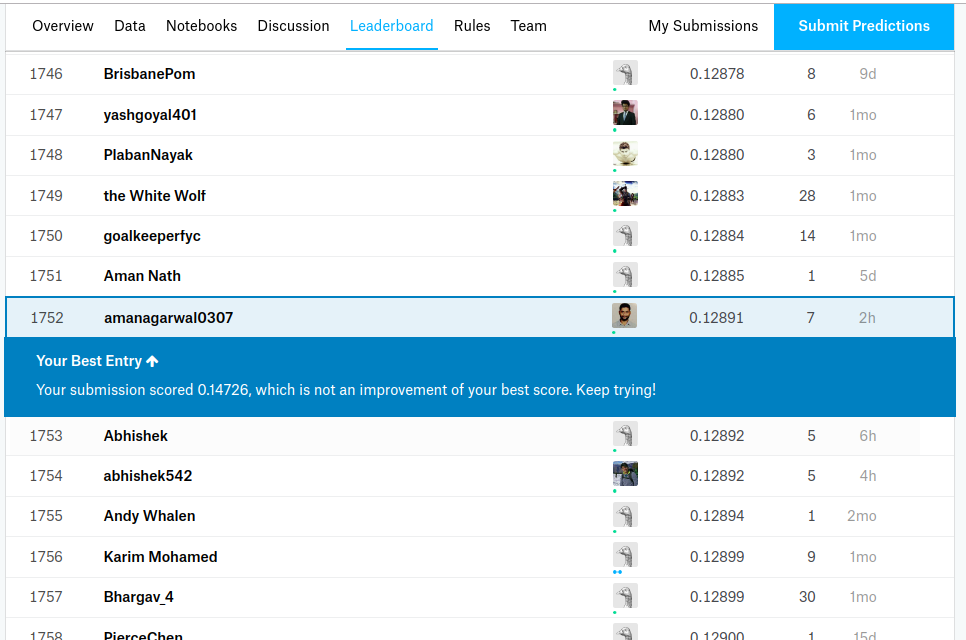

In [0]:
from IPython.display import Image
Image("/content/Kaggle - House Price Prediction.png")